In [15]:
#preprocessing SANBS data

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns



In [129]:
# load merged dataset (donation_donor, deferrals, collec_sites)

df=pd.read_csv("../1_data/private/VitalantData.csv", nrows= 1000000)
print(df.columns)
pd.set_option('display.max_columns', 48)
df.head()


C:\Users\hjagirdar\AppData\Local\Temp\ipykernel_12512\3579686635.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../1_data/private/VitalantData.csv", nrows= 1000000)


Index(['DON_DATE_KEY', 'DONOR_KEY', 'DONOR_NUMBER', 'DONATION_NUMBER',
       'ACTIVE_DONOR_TYPE', 'SITE_KEY', 'COLLECTION_SITE_KEY',
       'DONATION_VOLUME_DRAWN', 'DRIVE_ID', 'PHLEB_START_TIME_KEY',
       'PHLEB_STOP_TIME_KEY', 'PHLEBOTOMY_CODE', 'PHLEBOTOMY_DESC',
       'PHLEBOTOMY_STATUS', 'DONATION_PROCEDURE_TYPE', 'PHLEBOTOMY_GROUP',
       'DONATION_TYPE', 'DONATION_BAG_DESCRIPTION', 'DONOR_GENDER',
       'DONOR_ABORH', 'DONOR_ETHNICITY_DESC', 'RACE_ETHNICITY',
       'RACE_DESCRIPTION', 'DONOR_COUNTRY_OF_BIRTH', 'DONOR_EDUCATION_DESC',
       'DONOR_WEIGHT', 'DONOR_HEIGHT', 'DONOR_ZIPCODE',
       'DONOR_AGE_AT_DONATION', 'COLLECTION_FIXED_LOCATION',
       'COLLECTION_SITE_VALID_FLAG', 'BECS_ID', 'DRIVE_SETUP_TYPE',
       'DRIVE_TYPE_FIXED_MOBILE', 'DEFERRAL_EVENT', 'DEFERRAL_INFORMATION',
       'DEFERRAL_CREATE_DATE', 'DEFERRAL_START_DATE', 'DEFERRAL_STOP_DATE',
       'DEF_INVALDATION_DATE', 'DEFERRAL', 'DEFERRAL_DESCRIPTION',
       'DEFERRAL_VALID_CODE', 'DEFERRAL_DU

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,DONOR_EDUCATION_DESC,DONOR_WEIGHT,DONOR_HEIGHT,DONOR_ZIPCODE,DONOR_AGE_AT_DONATION,COLLECTION_FIXED_LOCATION,COLLECTION_SITE_VALID_FLAG,BECS_ID,DRIVE_SETUP_TYPE,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP
0,20130625.0,15057895.0,82X912T,W28861300166600F,Active,3003.0,62130.0,NaN,NaN,18:58:01,19:10:01,W,WHOLE BLOOD,Successful Phlebotomy,Other,Whole Blood,Allogeneic,Historical Triple Bag,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),BACHELOR'S DEGREE,278.0,74.0,606,56.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140525.0,840652.0,5006735,W04221402205100P,First Time,51.0,383.0,500.0,612.0,17:04:01,17:14:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),SOME COLLEGE OR TECHNICAL SCHOOL,175.0,69.0,890,63.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20141018.0,792640.0,2109508,W04221404264200Q,Active,51.0,376.0,452.0,600.0,10:24:01,12:14:01,A,APHERESIS (PLT/GRAN),Successful Phlebotomy,Automated,Platelet,Allogeneic,TRIMA APHERESIS PLATELETS,M,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),SOME COLLEGE OR TECHNICAL SCHOOL,205.0,68.0,890,36.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140726.0,7079135.0,5024441,W04221402021200I,First Time,51.0,380.0,500.0,602.0,12:28:01,12:49:01,U,UNSUCCESSFUL DRAW,Unsuccessful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),HIGH SCHOOL GRAD-DIPLOMA OR EQUIV,190.0,70.0,891,25.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20140519.0,6126680.0,4186033,W042214021267009,Active,51.0,383.0,440.0,612.0,11:31:01,12:05:01,R,2RBC - ALLOGENEIC,Successful Phlebotomy,Automated,2RBC,Allogeneic,HAEMONETICS APHERESIS 2RBC FILTERED,M,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),"9th,10th,11th,12th GRADE-NO DIPLOMA",190.0,69.0,864,18.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# donor history
#merge with don hist dataset
#df['DEFERRAL_GROUP'].value_counts()

In [131]:
#add a column OUTCOME_TYPE that indicates hgb deferal, other deferral or completed donation to indicate deferral type

df['OUTCOME_TYPE'] = np.where(df.DEFERRAL_GROUP.notnull(), None, 'completed')
df.loc[(df['DEFERRAL_GROUP'] == "Low Hemoglobin") | (df["DEFERRAL_GROUP"]=='Blood Loss'), 'OUTCOME_TYPE'] = 'low hgb'
#df.loc[(!(df["DEFERRAL_GROUP"].isna)) & (df["DEFERRAL_GROUP"]!='Blood Loss') & (df['DEFERRAL_GROUP'] != "Low Hemoglobin"), 'OUTCOME_TYPE'] = 'other deferral''
#df.loc[(df['PHLEBOTOMY_STATUS'] != "Successful Phlebotomy") & !(df["DEFERRAL_GROUP"].isnull()), 'OUTCOME_TYPE'] = 'other deferral'
df['OUTCOME_TYPE'].fillna("other deferral", inplace=True)

df.drop(df[df['DON_DATE_KEY'].isna()].index, inplace=True) #remove any missing visit dates

df["Visit_Date"] = pd.to_datetime(df['DON_DATE_KEY'], format='%Y%m%d') #convert to datetime object

df.sort_values(by=['DONOR_KEY', 'DONOR_NUMBER', 'Visit_Date'], axis = 0, inplace=True)

df['OUTCOME_TYPE'].value_counts()

completed         971695
low hgb            19996
other deferral      8309
Name: OUTCOME_TYPE, dtype: int64

In [132]:
print(len(df.loc[df['OUTCOME_TYPE']=='low hgb'])) # number of deferrals
print(len(df))#total observations


19996
1000000


In [133]:
#drop unknown donor number or donor key 0
df.drop(df[(df['DONOR_KEY'] == 0.0) & (df['DONOR_NUMBER'] == 'UNKNOWN')].index, inplace=True)
df.head()

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,...,DONOR_WEIGHT,DONOR_HEIGHT,DONOR_ZIPCODE,DONOR_AGE_AT_DONATION,COLLECTION_FIXED_LOCATION,COLLECTION_SITE_VALID_FLAG,BECS_ID,DRIVE_SETUP_TYPE,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,OUTCOME_TYPE,Visit_Date
828614,20120919.0,170.0,4986070,W14281201845100A,First Time,113.0,564.0,NaN,NaN,17:28:01,17:39:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple WB Filter Set,F,O +,NOT HISPANIC - CHINESE,"Asian/Pacific Islander, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,930,32.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2012-09-19
643460,20130320.0,189.0,4991515,W14281301136600P,First Time,113.0,568.0,NaN,NaN,14:16:01,14:53:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Double WB Filter Set,M,B +,REFUSED - REFUSED,Missing/Unknown/Refused,NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,934,16.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2013-03-20
237470,20130109.0,281.0,3364161,W04121207813200B,Active,34.0,142.0,940.0,NaN,13:55:01,14:07:01,Q,RBCP - ALLOGENEIC,Successful Phlebotomy,Automated,RBCP,Allogeneic,HAEMONETICS APHERESIS RBCP ADDITIVE,F,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,155.0,64.0,871,29.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2013-01-09
580947,20220719.0,281.0,3364161,W04122202893700Q,Active,34.0,136.0,530.0,270.0,09:02:01,09:15:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,F,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,155.0,64.0,871,38.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2022-07-19
219117,20120229.0,417.0,4560801,W14281214080900O,Active,113.0,566.0,NaN,NaN,15:01:01,15:37:01,R,2RBC - ALLOGENEIC,Successful Phlebotomy,Automated,2RBC,Allogeneic,ALYX APHERESIS 2RBC,M,A +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,NaN,NaN,931,68.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2012-02-29


In [134]:
# generate some cross tables
#df['DEFERRAL_GROUP'].fillna(value='missing', inplace=True)
#df.head(25)
#pd.set_option('display.max_rows', 1500)
#pd.crosstab(index=df['DONATION_BAG_DESCRIPTION'], columns=df['DEFERRAL_GROUP'], dropna=False)


In [135]:
#add censored column (indicates whether row is right censored) 0-censored, 1-notcensored
df['CENSORED']=np.where(df['DONOR_KEY'] == df['DONOR_KEY'].shift(-1), 1, 0)

#add time_to_return column (time between visits)
#if return exists -> difference between visit dates
#else difference between visit date and end of data collection 2022-12-31

df['time_to_return']= np.where(df['CENSORED']==1, (df['Visit_Date'].shift(-1)-df['Visit_Date'])/np.timedelta64(1, 'D'), (dt.datetime(2022, 12, 31)-df["Visit_Date"])/np.timedelta64(1, 'D'))
#df['time_to_return'].fillna((df['VISIT_DATE'].shift(-1)-df["VISIT_DATE"])/np.timedelta64(1, 'D'), inplace=True)

df.head()

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,...,DONOR_ZIPCODE,DONOR_AGE_AT_DONATION,COLLECTION_FIXED_LOCATION,COLLECTION_SITE_VALID_FLAG,BECS_ID,DRIVE_SETUP_TYPE,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,OUTCOME_TYPE,Visit_Date,CENSORED,time_to_return
828614,20120919.0,170.0,4986070,W14281201845100A,First Time,113.0,564.0,NaN,NaN,17:28:01,17:39:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple WB Filter Set,F,O +,NOT HISPANIC - CHINESE,"Asian/Pacific Islander, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,930,32.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2012-09-19,0,3755.0
643460,20130320.0,189.0,4991515,W14281301136600P,First Time,113.0,568.0,NaN,NaN,14:16:01,14:53:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Double WB Filter Set,M,B +,REFUSED - REFUSED,Missing/Unknown/Refused,NaN,UNITED STATES (INCLUDING HAWAII),...,934,16.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2013-03-20,0,3573.0
237470,20130109.0,281.0,3364161,W04121207813200B,Active,34.0,142.0,940.0,NaN,13:55:01,14:07:01,Q,RBCP - ALLOGENEIC,Successful Phlebotomy,Automated,RBCP,Allogeneic,HAEMONETICS APHERESIS RBCP ADDITIVE,F,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,871,29.0,No,Y,VTL,Mobile Setup,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2013-01-09,1,3478.0
580947,20220719.0,281.0,3364161,W04122202893700Q,Active,34.0,136.0,530.0,270.0,09:02:01,09:15:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,F,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,871,38.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2022-07-19,0,165.0
219117,20120229.0,417.0,4560801,W14281214080900O,Active,113.0,566.0,NaN,NaN,15:01:01,15:37:01,R,2RBC - ALLOGENEIC,Successful Phlebotomy,Automated,2RBC,Allogeneic,ALYX APHERESIS 2RBC,M,A +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,931,68.0,Yes,Y,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2012-02-29,0,3958.0


In [136]:
#print(df.DRIVE_SETUP_TYPE.value_counts())
#print(df.DRIVE_TYPE_FIXED_MOBILE.value_counts())
#print(df.COLLECTION_FIXED_LOCATION.value_counts())


0.03059327130016458
0.009161657754443303
505536
494452


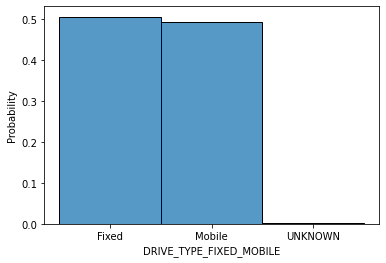

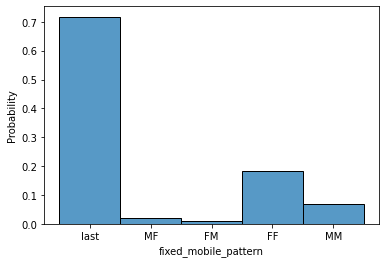

In [137]:
#Fixed-Mobile Donations Analysis

#plot number - mobile=0, fixed=1

sns.histplot(df, x="DRIVE_TYPE_FIXED_MOBILE", stat="probability")


df['Fixed_mobile'] = np.where(df["DRIVE_TYPE_FIXED_MOBILE"] == 'Fixed', 1, 0) #mobile is 0, fixed is 1
#sns.histplot(df, x="Fixed_mobile", stat="probability")

#create a column to indicate 
    #1. mobile then mobile - mm
    #2. mobile then fixed -mf
    #3. fixed then fixed - ff
    #4. fixed then mobile - fm

df["FIXED_NEXT"] = np.where((df['DONOR_KEY'] == df['DONOR_KEY'].shift(-1)), df['Fixed_mobile'].shift(-1), 10)
df.loc[((df['FIXED_NEXT']== 1) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FF'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MM'

df.loc[((df['FIXED_NEXT']==0) & (df['Fixed_mobile']== 1)), 'fixed_mobile_pattern'] = 'FM'

df.loc[((df['FIXED_NEXT']==1) & (df['Fixed_mobile']== 0)), 'fixed_mobile_pattern']= 'MF'
df['fixed_mobile_pattern'].fillna('last', inplace=True)


#Plot fixed pattern
#create value count
plt.figure()
sns.histplot(df, x="fixed_mobile_pattern", stat="probability")
#sns.countplot(fixed_mobile)



# percent population fixed vs mobile by year
#plt.figure()
#sns.histplot(data=df, x="Visit_yr", hue="Fixed_mobile", binwidth=1)

# the % of each resulting in hemoglobin deferral or other deferral

print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 1))])/len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[((df['OUTCOME_TYPE']=="low hgb") & (df['Fixed_mobile']== 0))])/len(df.loc[(df['Fixed_mobile']==0)]))

print(len(df.loc[(df['Fixed_mobile']==1)]))
print(len(df.loc[(df['Fixed_mobile']==0)]))



In [138]:
# drop permamnent deferrals

df.drop(df[(df['DEFERRAL_DURATION'] == 99999.0)].index, inplace=True)

In [139]:
# drop non-whole blood and non-rbc don_procs
df.drop(df[(df['PHLEBOTOMY_GROUP'] != 'Whole Blood') & (df['PHLEBOTOMY_GROUP'] != 'RBCP')].index, inplace=True)
df.PHLEBOTOMY_GROUP.value_counts()

Whole Blood    734860
RBCP             6256
Name: PHLEBOTOMY_GROUP, dtype: int64

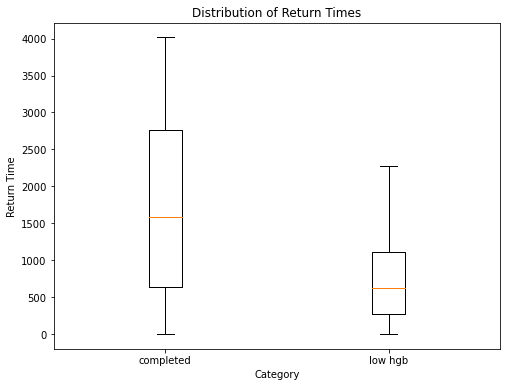

0


In [140]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['OUTCOME_TYPE'] == 'completed']['time_to_return'],
             df[df['OUTCOME_TYPE'] == 'low hgb']['time_to_return']],
            labels=['completed', 'low hgb'])

plt.xlabel('Category')
plt.ylabel('Return Time')
plt.title('Distribution of Return Times')
plt.show()

df_end=df.loc[df['time_to_return'] <0]
print(len(df_end))



In [141]:
#df.loc[df.OUTCOME_TYPE == 'low hgb'].head(50)
#df.loc[df.DEFERRAL_DURATION>1000].head()

In [142]:
#compute time_to_return with shifts for completed donation: subtract 56 days 
df['time_to_return_wo'] = df['time_to_return']
df['time_to_return'] = np.where(df['OUTCOME_TYPE'] == 'completed', (df['time_to_return_wo'] - 56), df['time_to_return'])

#compute time_to_return with shifts for other donations
#subtract by DEFERRAL_DURATION fr deferrals

df['time_to_return'] = np.where(df['OUTCOME_TYPE'] != 'completed', (df['time_to_return_wo'] - df['DEFERRAL_DURATION']), df['time_to_return'])


df['time_to_return'].isna().sum()

0

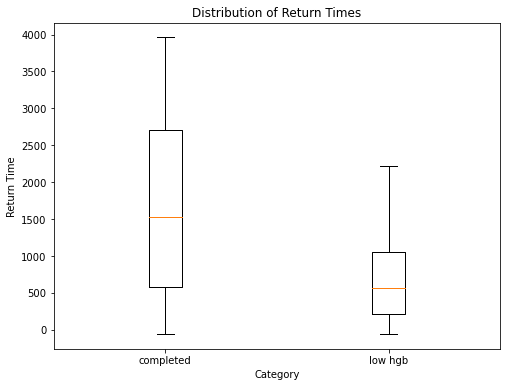

444


,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,...,BECS_ID,DRIVE_SETUP_TYPE,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,OUTCOME_TYPE,Visit_Date,CENSORED,time_to_return,Fixed_mobile,FIXED_NEXT,fixed_mobile_pattern,time_to_return_wo
123082,20190306.0,180836.0,7603484,W03621903689900V,Reengaged,179.0,825.0,500.0,523.0,13:29:01,13:37:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,B +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,VTL,Mobile Setup,Mobile,Integration of Results,Donation W03621903689900V Result NEGATIVE for ...,2019-03-10,2019-03-06 00:00:00,2019-09-02 00:00:00,9998-12-30 00:00:00,7631.0,NAT HBV NEG,Y,180.0,End Date Can be Lengthened or Shortened (user ...,Don't allow,Testing,other deferral,2019-03-06,1,-180.0,0,0.0,MM,0.0
750124,20211103.0,355585.0,82UKH1S,W041021147407008,Reengaged,26.0,45.0,530.0,156.0,13:23:01,13:32:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Triple RBC Filter Set,M,O -,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,VTL,Fixed,Fixed,Integration of Results,Donation W041021147407008 Result NEGATIVE for ...,2021-11-13,2021-11-03 00:00:00,2022-05-02 00:00:00,9998-12-30 00:00:00,7621.0,NAT HCV NEG,Y,180.0,End Date Can be Lengthened or Shortened (user ...,Don't allow,Testing,other deferral,2021-11-03,1,-180.0,1,1.0,FF,0.0
704200,20190117.0,532124.0,82UDCRC,W11701900344100L,Active,130.0,638.0,500.0,69.0,15:14:01,15:20:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,B +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,VTL,Mobile,Mobile,Integration of Results,Donation W11701900344100L Result NEGATIVE for ...,2019-01-21,2019-01-17 00:00:00,2019-07-16 00:00:00,9998-12-30 00:00:00,7631.0,NAT HBV NEG,Y,180.0,End Date Can be Lengthened or Shortened (user ...,Don't allow,Testing,other deferral,2019-01-17,1,-180.0,0,0.0,MM,0.0
167420,20220510.0,996210.0,3534512,W04252201921800N,Active,108.0,524.0,500.0,428.0,16:30:01,16:36:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CPD: Double RBC Filter Set,F,O +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,VTL,Mobile Setup,Mobile,Integration of Results,Donation W04252201921800N Result NEGATIVE for ...,2022-05-18,2022-05-10 00:00:00,2022-11-06 00:00:00,9998-12-30 00:00:00,7631.0,NAT HBV NEG,Y,180.0,End Date Can be Lengthened or Shortened (user ...,Don't allow,Testing,other deferral,2022-05-10,1,-180.0,0,0.0,MM,0.0
438359,20201024.0,1005766.0,7534860,W03622025887200M,Active,179.0,806.0,500.0,517.0,09:29:01,09:40:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,A +,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,VTL,Mobile Setup,Mobile,Integration of Results,Donation W03622025887200M Result NEGATIVE for ...,2020-10-30,2020-10-24 00:00:00,2021-04-22 00:00:00,9998-12-30 00:00:00,7631.0,NAT HBV NEG,Y,180.0,End Date Can be Lengthened or Shortened (user ...,Don't allow,Testing,other deferral,2020-10-24,1,-180.0,0,0.0,MM,0.0
212958,20200401.0,1010720.0,7765608,W036220137147002,Active,179.0,805.0,500.0,515.0,08:15:01,08:20:01,W,WHOLE BLOOD,Successful Phlebotomy,WB,Whole Blood,Allogeneic,CP2D: Triple RBC Filter,M,AB+,NOT HISPANIC - WHITE,"White, NH",NaN,UNITED STATES (INCLUDING HAWAII),...,VTL,Mobile Setup,Mobile,Test R

In [144]:
# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['OUTCOME_TYPE'] == 'completed']['time_to_return'],
             df[df['OUTCOME_TYPE'] == 'low hgb']['time_to_return']],
            labels=['completed', 'low hgb'])

plt.xlabel('Category')
plt.ylabel('Return Time')
plt.title('Distribution of Return Times')
plt.show()

df_end=df.loc[df['time_to_return'] <-100]
print(len(df_end))
df_end.head(50)

In [145]:
#df.loc[df.DONOR_KEY==594921.0].head()

,DON_DATE_KEY,DONOR_KEY,DONOR_NUMBER,DONATION_NUMBER,ACTIVE_DONOR_TYPE,SITE_KEY,COLLECTION_SITE_KEY,DONATION_VOLUME_DRAWN,DRIVE_ID,PHLEB_START_TIME_KEY,PHLEB_STOP_TIME_KEY,PHLEBOTOMY_CODE,PHLEBOTOMY_DESC,PHLEBOTOMY_STATUS,DONATION_PROCEDURE_TYPE,PHLEBOTOMY_GROUP,DONATION_TYPE,DONATION_BAG_DESCRIPTION,DONOR_GENDER,DONOR_ABORH,DONOR_ETHNICITY_DESC,RACE_ETHNICITY,RACE_DESCRIPTION,DONOR_COUNTRY_OF_BIRTH,...,BECS_ID,DRIVE_SETUP_TYPE,DRIVE_TYPE_FIXED_MOBILE,DEFERRAL_EVENT,DEFERRAL_INFORMATION,DEFERRAL_CREATE_DATE,DEFERRAL_START_DATE,DEFERRAL_STOP_DATE,DEF_INVALDATION_DATE,DEFERRAL,DEFERRAL_DESCRIPTION,DEFERRAL_VALID_CODE,DEFERRAL_DURATION,DURATION_MODIF_TYPE,ALLOW_DISTRIBUTION,DEFERRAL_GROUP,OUTCOME_TYPE,Visit_Date,CENSORED,time_to_return,Fixed_mobile,FIXED_NEXT,fixed_mobile_pattern,time_to_return_wo
638581,20180416.0,594921.0,4232154,W04151800880300V,Non allogeneic donor,37.0,174.0,525.0,276.0,10:42:01,10:48:01,T,THERAPEUTIC PHLEBOTOMY,Successful Phlebotomy,WB,Whole Blood,Therapeutic,CP2D: Triple RBC Filter,M,O +,MEX/MEX-AMER/CHICANO - SOME OTHER RACE,Hispanic,WHITE,UNITED STATES (INCLUDING HAWAII),...,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2018-04-16,1,274.0,1,1.0,FF,330.0
294268,20190312.0,594921.0,4232154,W04151900397600F,Non allogeneic donor,37.0,174.0,525.0,276.0,15:20:01,15:28:01,T,THERAPEUTIC PHLEBOTOMY,Successful Phlebotomy,WB,Whole Blood,Therapeutic,Therapeutic - NO ADDITIVE,M,O +,MEX/MEX-AMER/CHICANO - SOME OTHER RACE,Hispanic,WHITE,UNITED STATES (INCLUDING HAWAII),...,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2019-03-12,1,-47.0,1,1.0,FF,9.0
543144,20190321.0,594921.0,4232154,W04151900431700W,Non allogeneic donor,37.0,174.0,525.0,276.0,13:25:01,13:31:01,T,THERAPEUTIC PHLEBOTOMY,Successful Phlebotomy,WB,Whole Blood,Therapeutic,Therapeutic - NO ADDITIVE,M,O +,MEX/MEX-AMER/CHICANO - SOME OTHER RACE,Hispanic,WHITE,UNITED STATES (INCLUDING HAWAII),...,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2019-03-21,1,-52.0,1,1.0,FF,4.0
543450,20190325.0,594921.0,4232154,W04151900438100G,Non allogeneic donor,37.0,174.0,525.0,276.0,11:44:01,11:50:01,T,THERAPEUTIC PHLEBOTOMY,Successful Phlebotomy,WB,Whole Blood,Therapeutic,Therapeutic - NO ADDITIVE,M,O +,MEX/MEX-AMER/CHICANO - SOME OTHER RACE,Hispanic,WHITE,UNITED STATES (INCLUDING HAWAII),...,VTL,Fixed,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,completed,2019-03-25,0,1321.0,1,10.0,last,1377.0


In [ ]:
#write preprocessed data to csv
df.to_csv(("../1_data/private/preprocessed_data_Vitalant.csv"), index=False)